In [3]:
import pandas as pd
import os
import numpy as np

In [4]:
metricas_textura_1T = pd.read_csv(r'/home/pedro/Documentos/2025-1/projetos-3/detector-impurezas-cafe/resultados/metricas_textura_1T.csv', sep=',')
metricas_textura_4T = pd.read_csv(r'/home/pedro/Documentos/2025-1/projetos-3/detector-impurezas-cafe/resultados/metricas_textura_4T.csv', sep=',')
metricas_textura_7T = pd.read_csv(r'/home/pedro/Documentos/2025-1/projetos-3/detector-impurezas-cafe/resultados/metricas_textura_7T.csv', sep=',')

# 1 T

In [15]:
cafe_padrao_df_1T = metricas_textura_1T[metricas_textura_1T['classe'] == 'cafe_padrao']
cafe_luisa_df_1T = metricas_textura_1T[metricas_textura_1T['classe'] == 'cafe_Luisa']
milho1_df_1T = metricas_textura_1T[metricas_textura_1T['classe'] == 'milho1']
milho3_df_1T = metricas_textura_1T[metricas_textura_1T['classe'] == 'milho3']

In [16]:
cafe_padrao_df_1T = cafe_padrao_df_1T.drop(columns=['classe'])
cafe_luisa_df_1T = cafe_luisa_df_1T.drop(columns=['classe'])
milho1_df_1T = milho1_df_1T.drop(columns=['classe'])
milho3_df_1T = milho3_df_1T.drop(columns=['classe'])

In [17]:
cafe_padrao_df_1T

,arquivo,intensidade_media,desvio_padrao,entropia,contraste,homogeneidade
0,cafe_10_1T.png,58.229770,25.235677,6.513739,250.685631,0.212740
1,cafe_11_1T.png,56.269183,23.970766,6.449842,221.697702,0.215081
2,cafe_12_1T.png,59.459500,25.277941,6.545455,171.286535,0.223429
3,cafe_13_1T.png,57.237876,23.895261,6.489522,143.067356,0.233080
4,cafe_14_1T.png,59.160620,24.422999,6.477414,212.919470,0.222645
5,cafe_1_1T.png,56.873706,23.497408,6.440092,166.217647,0.232007
6,cafe_2_1T.png,57.820432,27.160793,6.549959,283.535677,0.224348
7,cafe_3_1T.png,59.228757,27.194634,6.563255,305.885892,0.211932
8,cafe_4_1T.png,64.212134,29.579084,6.715989,396.305898,0.194990
9,cafe_5_1T.png,58.672560,23.116682,6.423035,186.998100,0.222449


In [18]:
import re

def extract_sample_number(filename):
    m = re.search(r'_(\d+)_', filename)
    return int(m.group(1)) if m else None

# Adiciona uma nova coluna 'numero_amostra' em cada dataframe
for df in [cafe_padrao_df_1T, cafe_luisa_df_1T, milho1_df_1T, milho3_df_1T]:
    df['numero_amostra'] = df['arquivo'].apply(extract_sample_number)



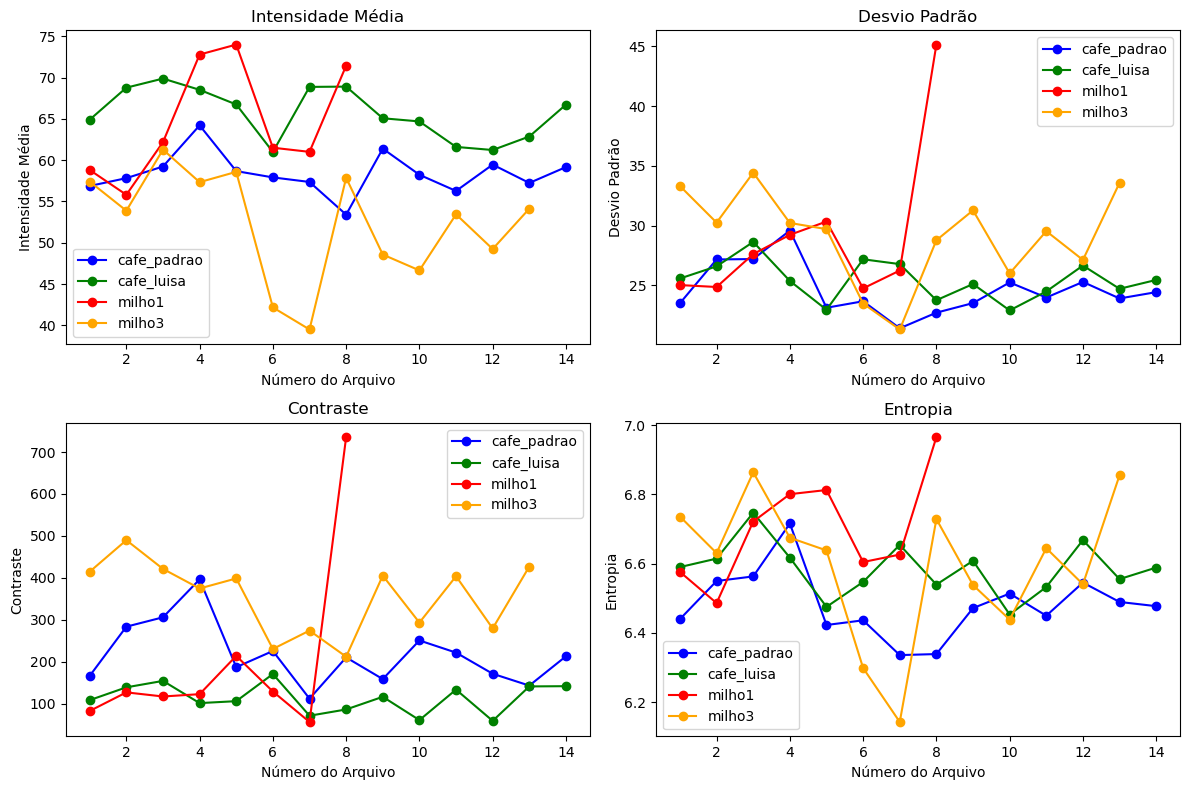

In [22]:
# Create a 2x2 subplot grid to plot the 4 metrics, each subplot showing all 4 classes.
import matplotlib.pyplot as plt

# Define the colors for each class (optional)
colors = {
    'cafe_padrao': 'blue',
    'cafe_luisa': 'green',
    'milho1': 'red',
    'milho3': 'orange'
}

# The list of titles (and associated metric column names using the "plots" dict)
titles = ['Intensidade Média', 'Desvio Padrão', 'Contraste', 'Entropia']

# Define the mapping of titles to dataframe column names
plots = {
    'Intensidade Média': 'intensidade_media',
    'Desvio Padrão': 'desvio_padrao',
    'Contraste': 'contraste',
    'Entropia': 'entropia'
}

# Define the mapping of class names to their respective dataframes
classes_dfs = {
    'cafe_padrao': cafe_padrao_df_1T,
    'cafe_luisa': cafe_luisa_df_1T,
    'milho1': milho1_df_1T,
    'milho3': milho3_df_1T
}

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Use axs.flat to iterate over all subplots
for i, metric_title in enumerate(titles):
    ax = axs.flat[i]
    metric = plots[metric_title]  # get the metric column name
    for cls, df_cls in classes_dfs.items():
        # Ensure the dataframe is sorted by the sample number
        df_sorted = df_cls.sort_values('numero_amostra')
        ax.plot(df_sorted['numero_amostra'], df_sorted[metric],
                marker='o', label=cls, color=colors.get(cls))
    ax.set_title(metric_title)
    ax.set_xlabel("Número do Arquivo")
    ax.set_ylabel(metric_title)
    ax.legend()

plt.tight_layout()
plt.show()

# 4 T

In [5]:
cafe_padrao_df_4T = metricas_textura_4T[metricas_textura_4T['classe'] == 'cafe_padrao']
cafe_luisa_df_4T = metricas_textura_4T[metricas_textura_4T['classe'] == 'cafe_Luisa']
milho1_df_4T = metricas_textura_4T[metricas_textura_4T['classe'] == 'milho1']
milho3_df_4T = metricas_textura_4T[metricas_textura_4T['classe'] == 'milho3']

In [6]:
cafe_padrao_df_4T = cafe_padrao_df_4T.drop(columns=['classe'])
cafe_luisa_df_4T = cafe_luisa_df_4T.drop(columns=['classe'])
milho1_df_4T = milho1_df_4T.drop(columns=['classe'])
milho3_df_4T = milho3_df_4T.drop(columns=['classe'])


In [7]:
import re

def extract_sample_number(filename):
    m = re.search(r'_(\d+)_', filename)
    return int(m.group(1)) if m else None

# Adiciona uma nova coluna 'numero_amostra' em cada dataframe
for df in [cafe_padrao_df_4T, cafe_luisa_df_4T, milho1_df_4T, milho3_df_4T]:
    df['numero_amostra'] = df['arquivo'].apply(extract_sample_number)



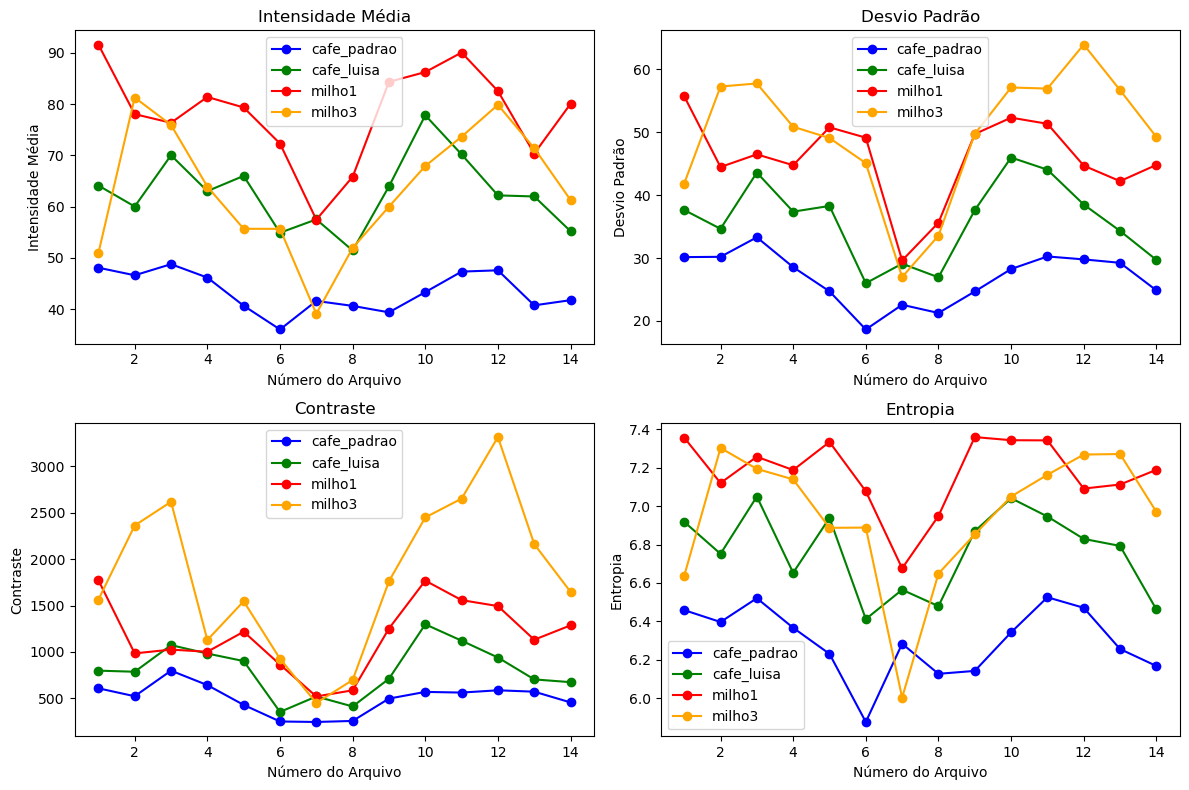

In [8]:
# Create a 2x2 subplot grid to plot the 4 metrics, each subplot showing all 4 classes.
import matplotlib.pyplot as plt

# Define the colors for each class (optional)
colors = {
    'cafe_padrao': 'blue',
    'cafe_luisa': 'green',
    'milho1': 'red',
    'milho3': 'orange'
}

# The list of titles (and associated metric column names using the "plots" dict)
titles = ['Intensidade Média', 'Desvio Padrão', 'Contraste', 'Entropia']

# Define the mapping of titles to dataframe column names
plots = {
    'Intensidade Média': 'intensidade_media',
    'Desvio Padrão': 'desvio_padrao',
    'Contraste': 'contraste',
    'Entropia': 'entropia'
}

# Define the mapping of class names to their respective dataframes
classes_dfs = {
    'cafe_padrao': cafe_padrao_df_4T,
    'cafe_luisa': cafe_luisa_df_4T,
    'milho1': milho1_df_4T,
    'milho3': milho3_df_4T
}

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Use axs.flat to iterate over all subplots
for i, metric_title in enumerate(titles):
    ax = axs.flat[i]
    metric = plots[metric_title]  # get the metric column name
    for cls, df_cls in classes_dfs.items():
        # Ensure the dataframe is sorted by the sample number
        df_sorted = df_cls.sort_values('numero_amostra')
        ax.plot(df_sorted['numero_amostra'], df_sorted[metric],
                marker='o', label=cls, color=colors.get(cls))
    ax.set_title(metric_title)
    ax.set_xlabel("Número do Arquivo")
    ax.set_ylabel(metric_title)
    ax.legend()

plt.tight_layout()
plt.show()